In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [3]:
# Read the csv file into a pandas DataFrame

mortality = pd.read_csv('SuperP_Group_CRC_Dataset.csv')
mortality.head()

,Unnamed: 0,FIPS Code,"County, State",Population,Deaths,Crude Rate,Median Household Income ($),% <High School,% High School,% Associate,...,% White,% Black,% Native American,% Asian,% Pacific Islander,% Other,% Two or More Races,"Estimated Diabetes Rate Per 1,000",% Daily Smokers,% Population Obese
0,0,1001,"Autauga County, AL",144568.0,188.0,130.0,53748,12.4,34.3,28.7,...,76.860615,18.521681,0.410543,0.806554,0.056313,1.387854,1.956439,13.2,18.41,37.5
1,1,1003,"Baldwin County, AL",514161.0,581.0,113.0,50976,10.0,28.7,31.8,...,86.432259,9.319834,0.679164,0.670643,0.000000,0.885169,2.012932,9.3,16.02,31.0
2,2,1005,"Barbour County, AL",71488.0,118.0,165.1,32111,26.2,34.9,26.0,...,46.704742,47.929661,0.172841,0.484707,0.000000,4.129406,0.578643,16.5,18.73,44.3
3,3,1007,"Bibb County, AL",62810.0,123.0,195.8,40113,19.3,41.8,26.9,...,76.953748,21.212121,0.358852,0.062024,0.000000,0.035442,1.377813,13.7,22.62,37.8
4,4,1009,"Blount County, AL",148438.0,194.0,130.7,46377,20.0,32.9,34.0,...,95.440524,1.568349,0.348329,0.159434,0.000000,0.868224,1.615139,12.6,19.88,34.4


In [48]:
# Assign X (data) and y (target)
#All columns X = mortality[['% <High School','% High School','% Associate','% >Bachelor','MYS','Median Household Income ($)', '% White', '% Black', '% Asian', '% Pacific Islander', '% Other', '% Two or More Races','Estimated Diabetes Rate Per 1,000','% Daily Smokers','% Population Obese']]
#Jason's columns X = mortality[['Income Level', 'MYS', 'Education Level', '% White', '% Black', '% Native American', '% Asian', '% Pacific Islander', '% Other', '% Two or More Races', 'Estimated Diabetes Rate Per 1,000', '% Daily Smokers', '% Population Obese']]
### BEGIN SOLUTION
# X = mortality[['Median Household Income ($)','% Daily Smokers','% Population Obese']]
# X_socio = mortality[['Median Household Income ($)', 'MYS' ]]
# X_comorbidity=mortality[['Estimated Diabetes Rate Per 1,000', '% Daily Smokers', '% Population Obese']]

X= mortality[['Median Household Income ($)', 'MYS']]
y = mortality["Crude Rate"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(2600, 2) (2600, 1)


In [49]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

### END SOLUTION

(1950, 2) (1950, 1)
(650, 2) (650, 1)


Text(0,0.5,'Predictions')

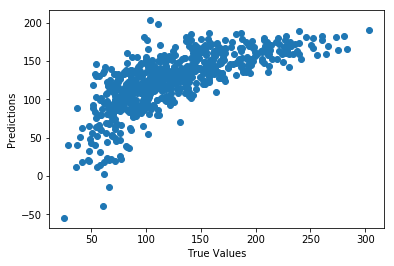

In [50]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [51]:
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
predictions = model.predict(X_test)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     8336.
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:16:22   Log-Likelihood:                -10152.
No. Observations:                1950   AIC:                         2.031e+04
Df Residuals:                    1948   BIC:                         2.032e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Median Household Income ($)    -0.0038   9.84e-05    -38.132      0.000      -0.004      -0.004
MYS                            21.5410      0.341     63.139      0.000      20.872      22.210
==============================================================================
Omnibus:                      202.171   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.169
Skew:                           0.630   Prob(JB):                     5.85e-97
Kurtosis:                       4.966   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# np.corrcoef(y_test, y_test)

In [53]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Carter\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [54]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Carter\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Carter\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [55]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

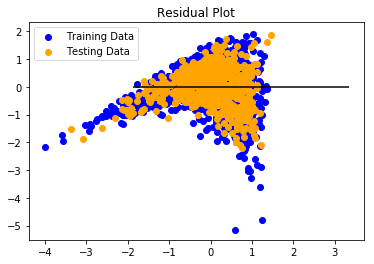

array([[-2.07202372e-03, -1.78515390e+01]])

In [56]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
lm.intercept_
lm.coef_
### END SOLUTION

In [57]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.44562121039578634, R2: 0.5016544290894442


In [58]:
### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 17826.50362131343, R2: 0.5016544290894442


In [46]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.28423930535453634, R2: 0.6821304830254427


In [47]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2824060211139189, R2: 0.6841806751173325


In [34]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33648093522128636, R2: 0.6237078041809581
